In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import to_datetime



In [10]:
df = pd.read_csv("C:\\Users\\win\\Downloads\\mymoviedb.csv", lineterminator='\n')
print(df.head())

  Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  In his second year of fighting crime, Batman u...    3827.658        1151   
2  Stranded at a rest stop in the mountains durin...    2618.087         122   
3  The tale of an extraordinary family, the Madri...    2402.201        5076   
4  As a collection of history's worst tyrants and...    1895.511        1793   

   Vote_Average Original_Language                               Genre  \
0           8.3                en  Action, Adventure, Science Fiction   
1           8.1                en            Crime, Mystery, Thriller   
2           6.3                en        

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [13]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.describe()


,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [20]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [21]:
df.head(

)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


DROPING THE COLUMNS

In [22]:
cols = ['Overview','Original_Language','Poster_Url']
df.drop(cols, axis=1, inplace=True)
df.columns


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [23]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [27]:
df['Vote_Average'].value_counts()


Vote_Average
6.4     435
6.3     429
6.5     427
6.8     423
6.7     420
       ... 
9.2       1
1.8       1
2.4       1
2.6       1
10.0      1
Name: count, Length: 74, dtype: int64

EXTRACTING YEAR FROM RELEASE DATE

In [37]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year


COUNTS BY TYPE

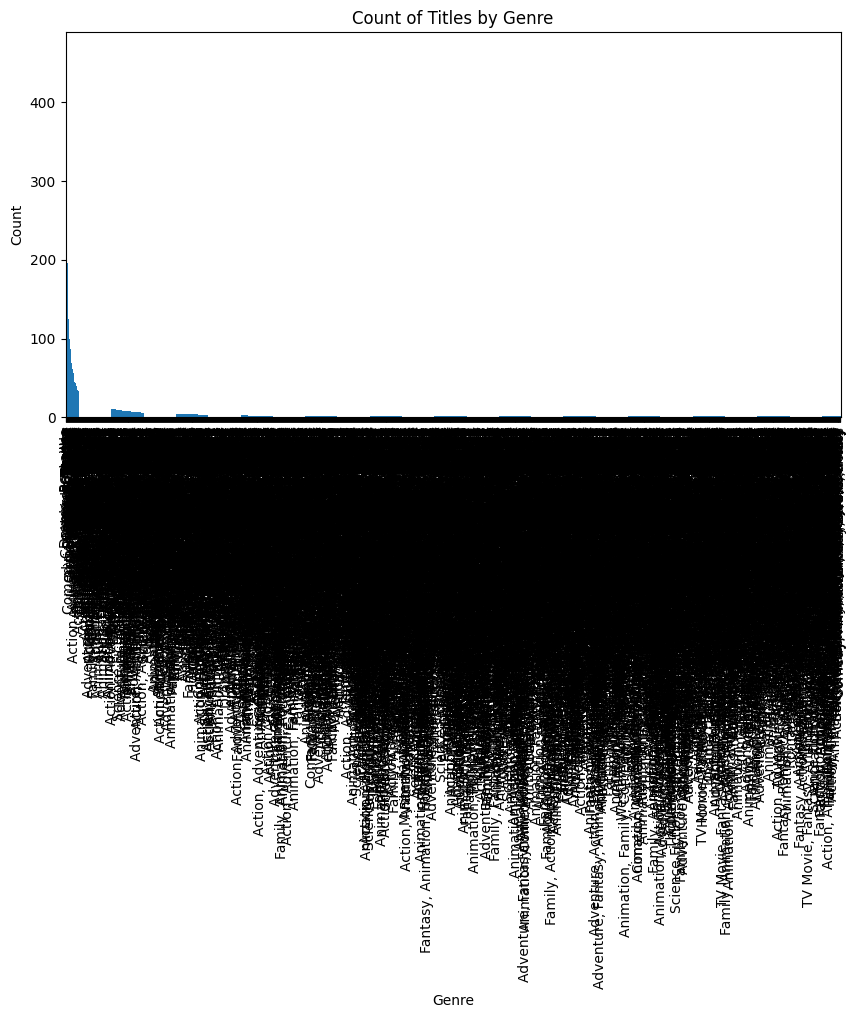

In [38]:
plt.figure(figsize=(10,5))
df['Genre'].value_counts().plot(kind='bar')
plt.title("Count of Titles by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


YEAR TRENDS

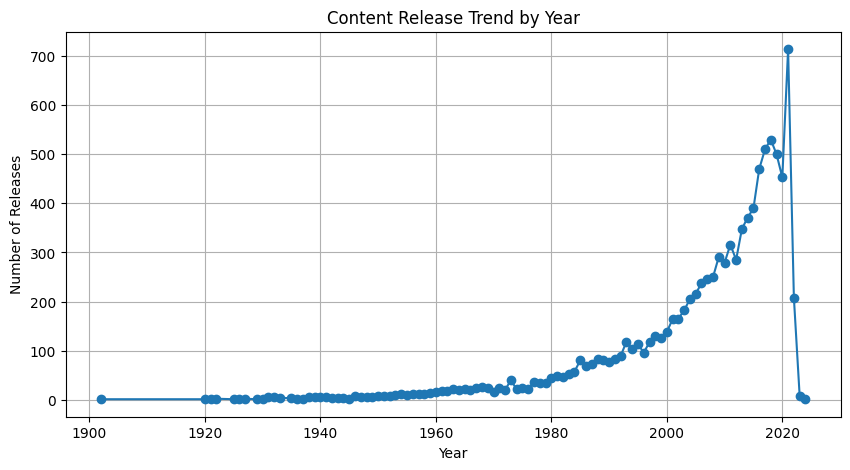

In [39]:
plt.figure(figsize=(10,5))
df['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Content Release Trend by Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.grid(True)
plt.show()


TOP 10 GENRESM

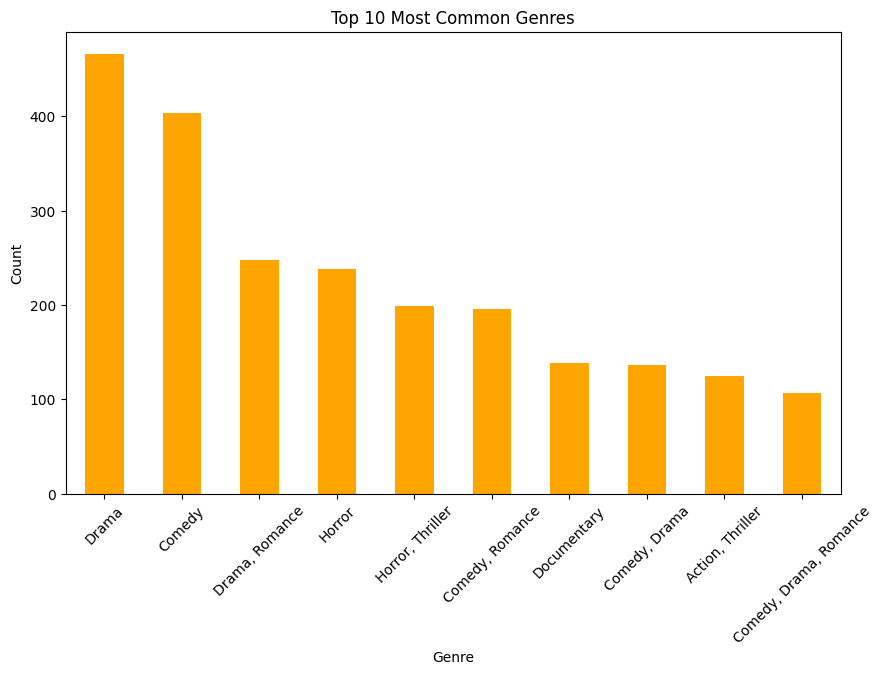

In [40]:
plt.figure(figsize=(10,6))
df['Genre'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


CONTENT GROWTH OVER TIME

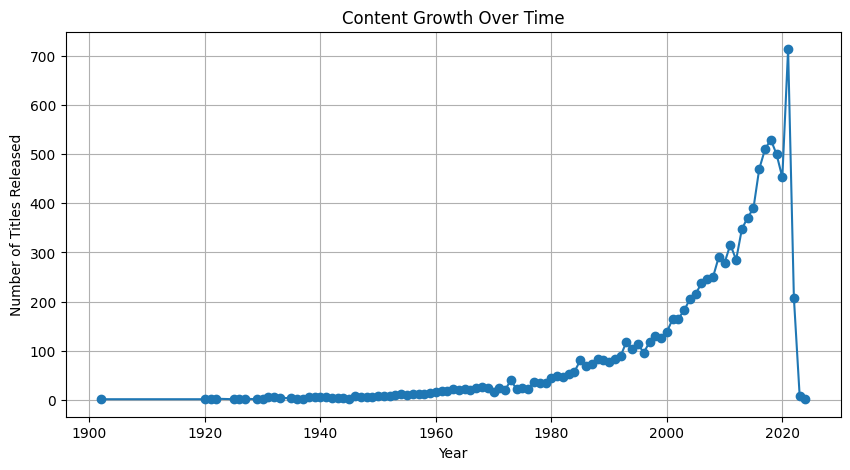

In [42]:
yearly = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(yearly.index, yearly.values, marker='o')
plt.title("Content Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles Released")
plt.grid(True)
plt.show()


summary top 10 list

TOP 10 GENRES

In [43]:
print("Top 10 Genres:")
print(df['Genre'].value_counts().head(10))


Top 10 Genres:
Genre
Drama                     466
Comedy                    403
Drama, Romance            248
Horror                    238
Horror, Thriller          199
Comedy, Romance           196
Documentary               139
Comedy, Drama             137
Action, Thriller          125
Comedy, Drama, Romance    107
Name: count, dtype: int64


TOP 10 BY RELEASE YEARSM

In [44]:
print("Top 10 Years:")
print(df['Year'].value_counts().head(10))


Top 10 Years:
Year
2021    714
2018    530
2017    510
2019    500
2016    470
2020    453
2015    390
2014    371
2013    348
2011    316
Name: count, dtype: int64
